<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [345]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [346]:
# Load files
train = pd.read_csv('/content/drive/MyDrive/CryptoJacking/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/CryptoJacking/Test.csv')
samplesubmission = pd.read_csv('/content/drive/MyDrive/CryptoJacking/SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [347]:
test.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

In [348]:
train['Pages Input/sec'].value_counts()

0.000000    8861
0.000630       6
0.005302       5
0.006446       4
2.955622       2
0.622123       2
0.555586       2
1.044410       2
1.577969       2
0.844335       2
0.622157       2
1.666501       2
0.466796       2
0.911329       2
1.422239       1
1.667658       1
0.933335       1
0.599948       1
2.200027       1
0.244378       1
1.999323       1
0.244374       1
0.488981       1
1.733327       1
0.422336       1
2.667046       1
Name: Pages Input/sec, dtype: int64

In [349]:
# train = train.drop('Pages Input/sec', axis = 1)

In [350]:
# Calcultating mean
mean_value = train['Pages Input/sec'].mean()
#Filling missing values with mean
train['Pages Input/sec'].replace(0.000000,mean_value,inplace=True)
# train['Pages Input/sec'].fillna(mean_value,inplace = True)

In [351]:
# Calcultating mean
mean_value = test['Pages Input/sec'].mean()
#Filling missing values with mean
test['Pages Input/sec'].replace(0.000000,mean_value,inplace=True)
# test['Pages Input/sec'].fillna(mean_value,inplace = True)

In [352]:
train['Pages Input/sec'].value_counts()

0.004177    8861
0.000630       6
0.005302       5
0.006446       4
2.955622       2
0.622123       2
0.555586       2
1.044410       2
1.577969       2
0.844335       2
0.622157       2
1.666501       2
0.466796       2
0.911329       2
1.422239       1
1.667658       1
0.933335       1
0.599948       1
2.200027       1
0.244378       1
1.999323       1
0.244374       1
0.488981       1
1.733327       1
0.422336       1
2.667046       1
Name: Pages Input/sec, dtype: int64

In [353]:
train.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius', 'Label'],
      dtype='object')

In [354]:
# test = test.drop('Pages Input/sec', axis = 1)

In [355]:
test.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

In [356]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.004651,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.004651,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.004651,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.004651,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.004651,771.665166,31.032570


In [358]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [359]:
train = train.replace(' ', np.NaN)

In [360]:
train.isna().sum()

ID                          0
I/O Data Operations         0
 I/O Data Bytes             0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent/sent             0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
Label                       0
dtype: int64

In [361]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [362]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [363]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.008333,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082714,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000630,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.004177,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.004177,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.004177,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [364]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [365]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

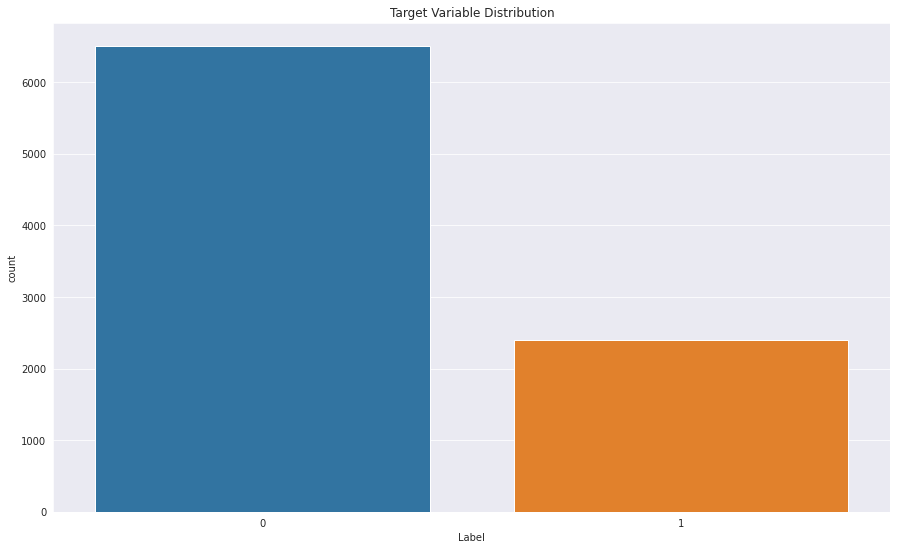

In [366]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(15, 9))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

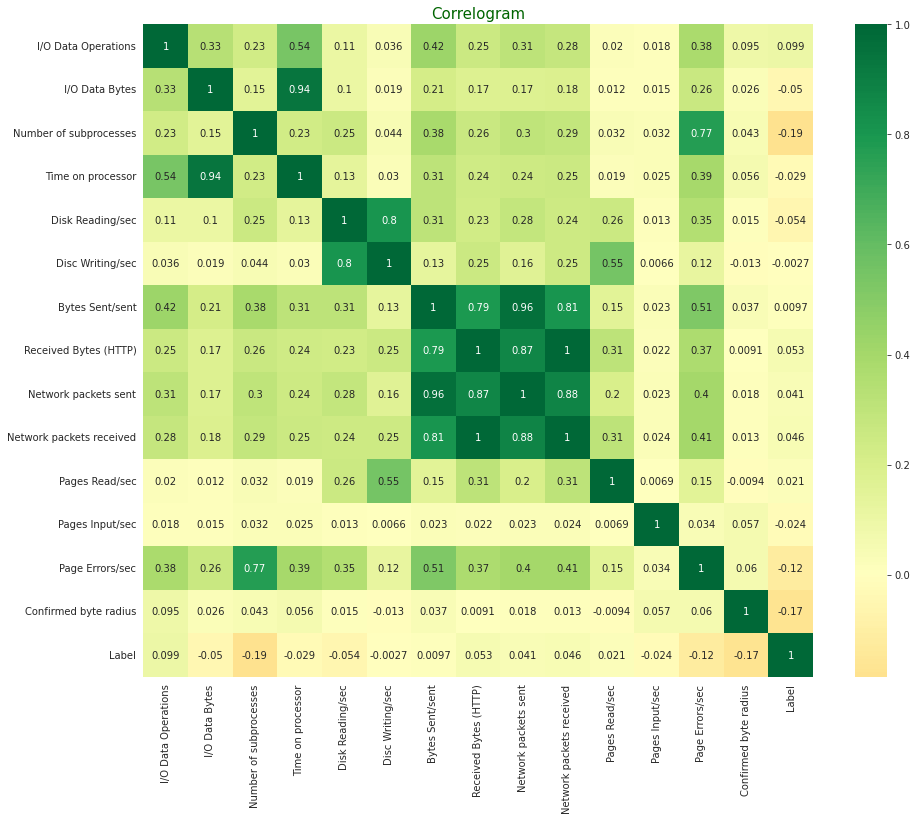

In [367]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

<a name="Preprocess"></a>
## 6. Modeling

In [368]:
#scale numerical features for logistic model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [369]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.01,
                                                    random_state=4070)

In [371]:
# Define LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 42,
    'learning_rate': 0.09,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# params = {
#     'boosting_type': 'goss',
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'num_leaves': 64,
#     'learning_rate': 0.09,
#     'max_depth': 6,
#     'min_child_samples': 20,
#     'min_split_gain': 0.5,
#     'colsample_bytree': 0.6,
#     'subsample': 0.8,
#     'reg_alpha': 1,
#     'reg_lambda': 1,
#     'n_estimators': 1000,
#     'verbose': -1,
#     'seed': 42
# }


# Create LightGBM dataset object
train_dataset = lgb.Dataset(X_train, y_train)

# Train LightGBM model
model = lgb.train(params, train_dataset)

# Make predictions on test data
X_test = test.drop('ID', axis=1) 
# Assuming 'id' column is present in test data
pred = model.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [372]:
#check performance of the model

# y_test = y_test.reindex(preds.index)
# print(classification_report(y_test,pred))
# print(classification_report(y_test, pred[:len(y_test)]))

In [373]:
test['Target'] = model.predict(test[features])

In [374]:
sub = test[['ID', 'Target']]

In [375]:
sub['Target'] = [0 if i < 0.5 else 1 for i in sub['Target']]

<ipython-input-375-ec81ea19549d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Target'] = [0 if i < 0.5 else 1 for i in sub['Target']]


In [ ]:
sub.head()

In [376]:
sub.to_csv('AAUmoja8.csv', index=False)